In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [2]:
#Loading the mnist dataset and split it into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

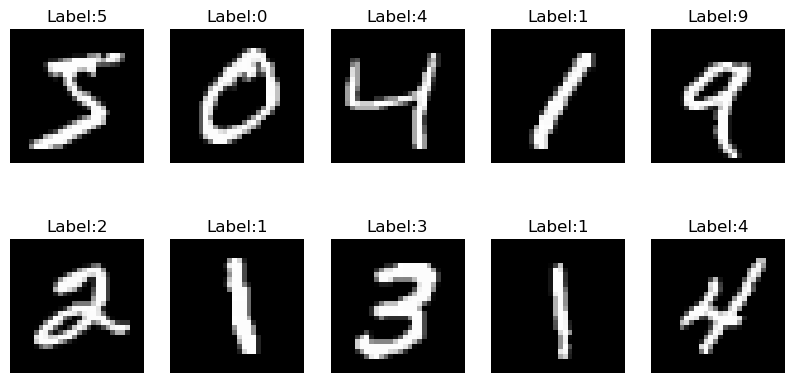

In [5]:
# displaying the first 10 images of the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label:{y_train[i]}')
    plt.axis('off')
plt.show()

In [6]:
# getting the dimensions of the training set
n = x_train.shape[1] * x_train.shape[2]
n

784

In [7]:
# reshaping and normalizing the training and testing sets to be 2D arrays
x_train = x_train.reshape(x_train.shape[0], n).astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], n).astype('float32') / 255.
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
#adding noise to the training and testing sets
noise_factor = 0.3
x_train_noise = x_train + noise_factor *np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) #mean=0.0, std=1.0
x_test_noise = x_test + noise_factor *np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:
#Clipping the values to be between 0 and 1
x_train_noise = np.clip(x_train_noise, 0., 1.)
x_test_noise = np.clip(x_test_noise, 0., 1.)

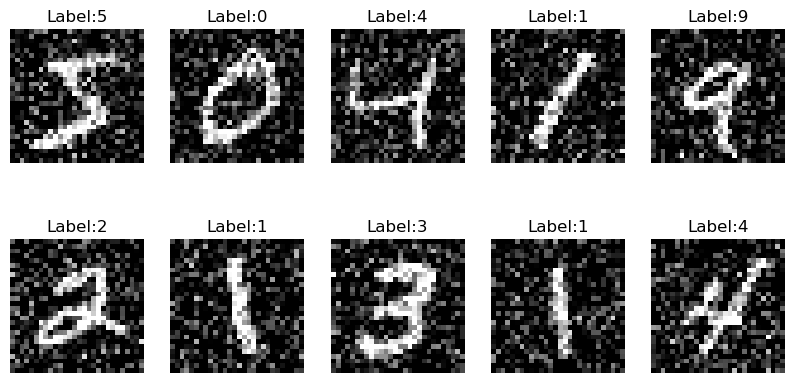

In [10]:
image_size = int(np.sqrt(n))  # e.g., if n=784, image_size = 28
#displaying the first 10 images of the noisy training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_noise[i].reshape(image_size, image_size), cmap='gray')
    plt.title(f'Label:{y_train[i]}')
    plt.axis('off')
plt.show()


In [11]:
#Creating the autoencoder model
input_img = tf.keras.layers.Input(shape=(n,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(n, activation='sigmoid')(decoded)

autoencoder = tf.keras.models.Model(input_img, decoded)

In [12]:
#Compiling the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the autoencoder model
history = autoencoder.fit(x_train_noise, x_train, epochs=15, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - val_loss: 0.0178
Epoch 2/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - val_loss: 0.0176
Epoch 3/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0169 - val_loss: 0.0174
Epoch 4/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0168 - val_loss: 0.0171
Epoch 5/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0166 - val_loss: 0.0169
Epoch 6/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 7/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0162 - val_loss: 0.0166
Epoch 8/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0160 - val_loss: 0.0167
Epoch 9/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0159 - val_loss: 0.0164
Epoch 10/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0158 - val_loss: 0.0163
Epoch 11/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0157 - val_loss: 0.0161
Epoch 12/15
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s

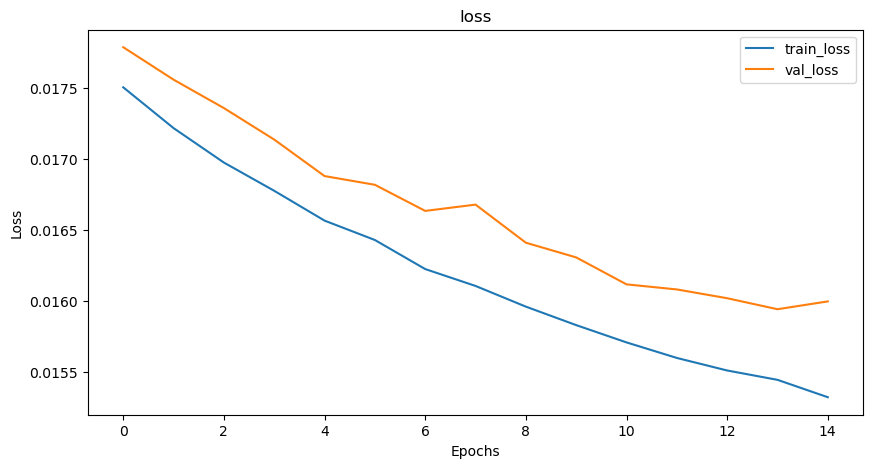

In [ ]:
#Plotting the training and validation loss

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Testing the autoencoder model
denoised_images = autoencoder.predict(x_test_noise)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
mse = np.mean(np.square(x_test - denoised_images), axis=1)
print(f'Mean Squared Error: {mse.mean()}')

Mean Squared Error: 0.015479150228202343


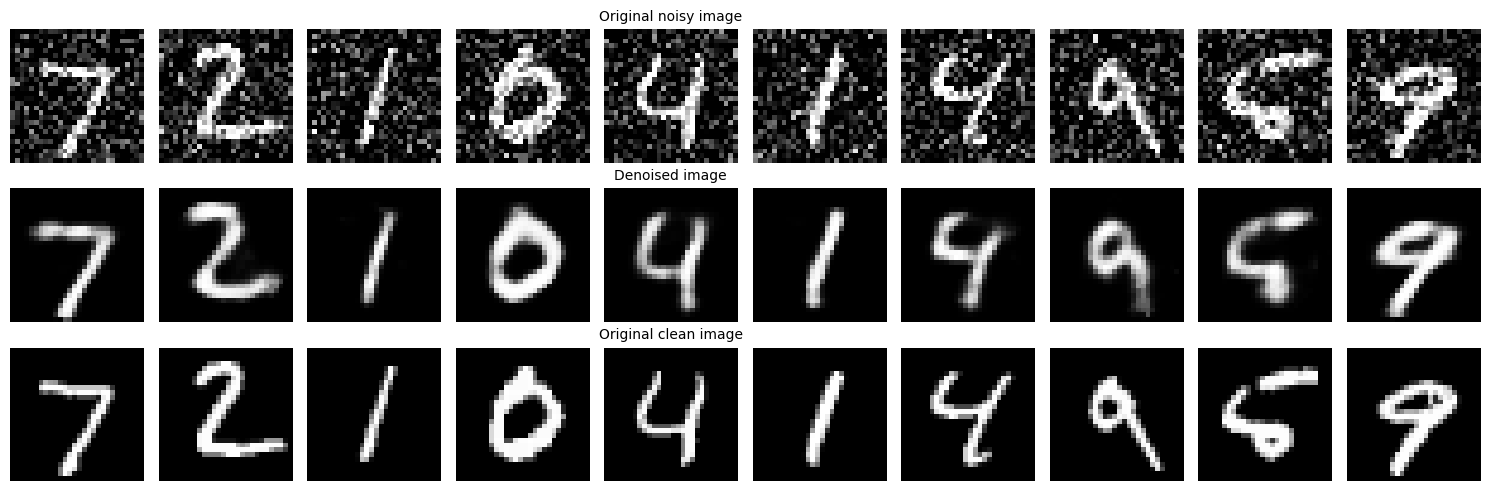

In [ ]:
# comparing the images of clean image, noisy image, and denoised image

plt.figure(figsize=(15, 5))
titles = ['Original noisy image', 'Denoised image', 'Original clean image']
images_list = [x_test_noise, denoised_images, x_test]

for row in range(3):
    for col in range(10):
        idx = row * 10 + col
        plt.subplot(3, 10, idx + 1)
        plt.imshow(images_list[row][col].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if col == 4:  # Show title in the middle column
            plt.title(titles[row], fontsize=10)

plt.tight_layout()
plt.show()
